# Iteration 2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Data Understanding

In [2]:
df1 = pd.read_csv('set15_it1_final.csv')

In [3]:
df2 = pd.read_csv('set15_it2.csv')

In [4]:
df1

,Unnamed: 0,DI,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft
...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft


In [5]:
df2

,DI,StructuralIntegrity,ExteriorCharm
0,0,4,Common
1,1,8,Common
2,2,5,Common
3,3,6,Common
4,4,6,Common
...,...,...,...
2358,2335,5,Gleaming
2359,2336,6,Common
2360,2337,6,Common
2361,2338,7,Common


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DI                   2363 non-null   int64 
 1   StructuralIntegrity  2363 non-null   int64 
 2   ExteriorCharm        2363 non-null   object
dtypes: int64(2), object(1)
memory usage: 55.5+ KB


In [7]:
df2.describe()

,DI,StructuralIntegrity
count,2363.000000,2363.000000
mean,1169.813796,5.563690
std,675.447687,1.103678
min,0.000000,1.000000
25%,584.500000,5.000000
50%,1170.000000,5.000000
75%,1753.500000,6.000000
max,2339.000000,9.000000


In [8]:
df2.sample(5)

,DI,StructuralIntegrity,ExteriorCharm
942,934,7,Gleaming
1387,1374,5,Gleaming
1518,1503,3,Common
1511,1496,5,Gleaming
1698,1682,6,Common


In [9]:
df2.isna().sum()

DI                     0
StructuralIntegrity    0
ExteriorCharm          0
dtype: int64

In [10]:
df2['ExteriorCharm'].value_counts()

ExteriorCharm
Common        1446
Gleaming       794
Enchanting      96
Modest          27
Name: count, dtype: int64

In [11]:
df2['StructuralIntegrity'].value_counts()

StructuralIntegrity
5    1349
6     421
7     307
8     118
4      82
3      41
9      35
2       7
1       3
Name: count, dtype: int64

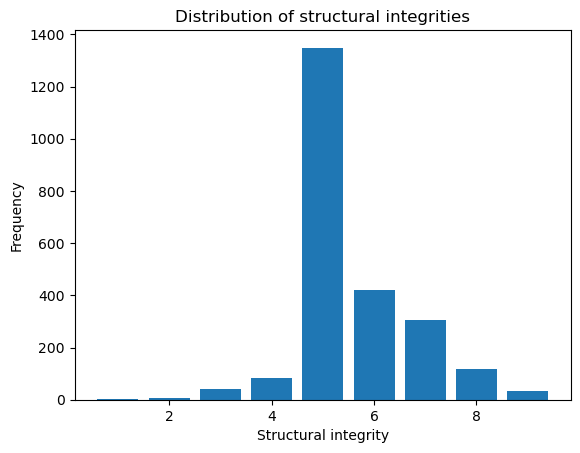

In [12]:
plt.bar([1, 2, 3, 4, 5, 6, 7, 8, 9], height=[3, 7, 41, 82, 1349, 421, 307, 118, 35])
plt.title('Distribution of structural integrities')
plt.xlabel('Structural integrity')
plt.ylabel('Frequency')
plt.show()

In [13]:
df2.loc[df2.duplicated()]

,DI,StructuralIntegrity,ExteriorCharm
61,60,6,Common
309,307,7,Common
391,388,7,Common
509,505,6,Common
522,517,5,Common
526,520,7,Common
599,592,5,Gleaming
660,652,6,Common
991,982,7,Common
1012,1002,5,Gleaming


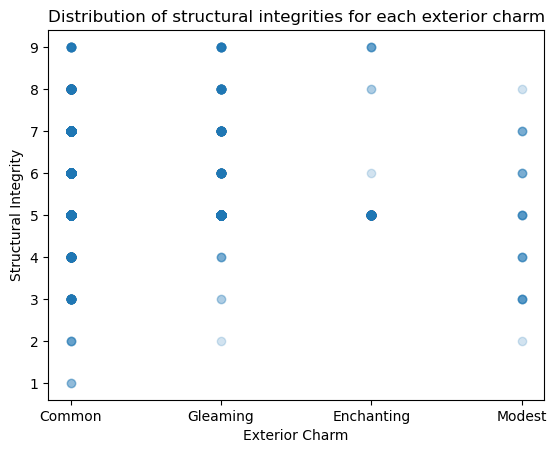

In [14]:
plt.scatter(df2['ExteriorCharm'], df2['StructuralIntegrity'], alpha=0.2)
plt.title('Distribution of structural integrities for each exterior charm')
plt.xlabel('Exterior Charm')
plt.ylabel('Structural Integrity')
plt.show()

This should give a nice general idea of how the data is distributed

## 2. Data Preparation

Since there would be a mismatch in row number otherwise, and all the data in this new set looks perfectly fine, we will first merge the datasets before repeating the data prep of iteration 1.

In [15]:
df = df1.merge(df2, left_index=True, right_index=True, how="left")

In [16]:
df

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,ParcelSizeUnit,DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,sqft,0,4,Common
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,sqft,1,8,Common
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,sqft,2,5,Common
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,sqft,3,6,Common
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,sqft,4,6,Common
...,...,...,...,...,...,...,...,...,...,...,...
2333,2358,2335,184500.0,Meadowlands,Duskwood,1056.0,13300.0,sqft,2310,5,Gleaming
2334,2359,2336,210000.0,Meadowlands,Nighthaven,1594.0,13175.0,sqft,2311,5,Common
2335,2360,2337,223500.0,Meadowlands,Stormwatch,1212.0,21384.0,sqft,2312,5,Common
2336,2361,2338,129900.0,Meadowlands,Dragonspire,627.0,7100.0,sqft,2313,6,Common


Since the ParcelSizeUnit column is all just sqft, that column can be deleted and instead ParcelSize should be renamed to clarify that it's in sqft

In [17]:
df.drop(columns=['ParcelSizeUnit'], inplace=True)

In [18]:
df.head()

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize,DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common
1,1,1,105000.0,GnomeBurough,Petalbridge,772.0,3960.0,1,8,Common
2,2,2,79275.0,Meadowlands,Shadowmere,664.0,8172.0,2,5,Common
3,3,3,140000.0,Meadowlands,Emberfall,1231.0,13825.0,3,6,Common
4,4,4,150909.0,GnomeBurough,Mystvale,1406.0,9060.0,4,6,Common


In [19]:
df.rename(columns={'ParcelSize' : 'ParcelSize (sqft)'}, inplace=True)

In [20]:
df.head(1)

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm
0,0,0,149500.0,Meadowlands,Dragonspire,1157.0,12160.0,0,4,Common


In [21]:
monthly_income = 2500

In [22]:
df['MonthlyPayment'] = ((df['TradeValue'] - (df['TradeValue'] * 0.2)) * (1/300) * (1 + (1/300)) ** 360) / ((1 + (1/300)) ** 360 - 1)

In [23]:
df.sample(5)

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment
1369,1384,1371,192000.0,Meadowlands,Sunspire,1100.0,9017.0,1357,5,Gleaming,733.309894
1060,1071,1061,122000.0,GnomeBurough,Petalbridge,1018.0,3068.0,1050,7,Gleaming,465.957328
1235,1248,1237,106250.0,Meadowlands,Petalbridge,995.0,10800.0,1224,5,Gleaming,405.803001
356,358,356,252000.0,Meadowlands,Wyverncliff,1510.0,12447.0,354,5,Gleaming,962.469236
898,907,899,161500.0,Meadowlands,Nighthaven,1032.0,9790.0,890,6,Common,616.820562


In [24]:
df.describe()

,Unnamed: 0,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1180.940975,1169.760479,181527.821215,1152.836612,10046.660674,1157.440120,5.564585,693.313267
std,682.682722,675.842382,80164.061659,377.971615,7126.006466,668.305004,1.105235,306.172393
min,0.000000,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,48.845314
25%,590.250000,584.250000,129925.000000,883.000000,7427.750000,578.250000,5.000000,496.225458
50%,1181.500000,1170.500000,160350.000000,1115.000000,9375.000000,1157.500000,5.000000,612.428341
75%,1772.750000,1754.750000,213000.000000,1326.000000,11509.000000,1735.750000,6.000000,813.515663
max,2362.000000,2339.000000,625000.000000,4339.000000,164660.000000,2314.000000,9.000000,2387.076477


In [25]:
df['AffordableDwelling'] = df['MonthlyPayment'] <= (monthly_income * 0.3)

In [26]:
df.sample(5)

,Unnamed: 0,DI_x,TradeValue,RealmType,Enclave,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,ExteriorCharm,MonthlyPayment,AffordableDwelling
2082,2104,2084,430000.0,Meadowlands,Glimmerwood,2483.0,12692.0,2062,3,Common,1642.308616,False
2277,2301,2279,137000.0,GnomeBurough,Petalbridge,1483.0,9142.0,2255,5,Gleaming,523.247164,True
1711,1730,1713,250000.0,Meadowlands,Nighthaven,2041.0,11029.0,1694,5,Gleaming,954.830591,False
2302,2327,2304,262500.0,Meadowlands,Nighthaven,1658.0,20781.0,2280,5,Gleaming,1002.572120,False
648,656,649,179900.0,GnomeBurough,Petalbridge,1495.0,9928.0,641,5,Gleaming,687.096093,True


In [27]:
df.describe()

,Unnamed: 0,DI_x,TradeValue,LivingQuarters,ParcelSize (sqft),DI_y,StructuralIntegrity,MonthlyPayment
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,1180.940975,1169.760479,181527.821215,1152.836612,10046.660674,1157.440120,5.564585,693.313267
std,682.682722,675.842382,80164.061659,377.971615,7126.006466,668.305004,1.105235,306.172393
min,0.000000,0.000000,12789.000000,256.000000,1470.000000,0.000000,1.000000,48.845314
25%,590.250000,584.250000,129925.000000,883.000000,7427.750000,578.250000,5.000000,496.225458
50%,1181.500000,1170.500000,160350.000000,1115.000000,9375.000000,1157.500000,5.000000,612.428341
75%,1772.750000,1754.750000,213000.000000,1326.000000,11509.000000,1735.750000,6.000000,813.515663
max,2362.000000,2339.000000,625000.000000,4339.000000,164660.000000,2314.000000,9.000000,2387.076477


In [28]:
df["AffordableDwelling"].value_counts()

AffordableDwelling
True     1624
False     714
Name: count, dtype: int64

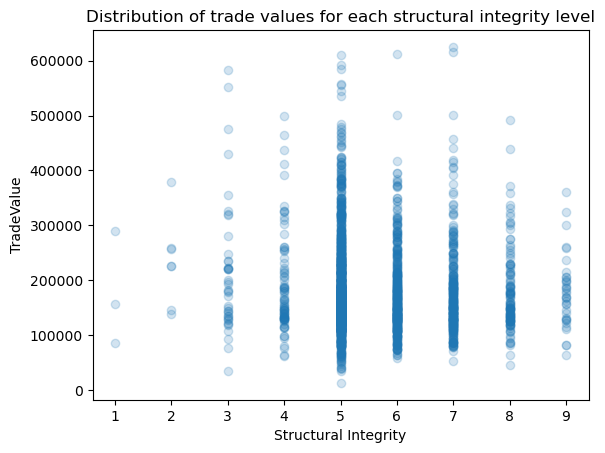

In [29]:
plt.scatter(df['StructuralIntegrity'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of trade values for each structural integrity level')
plt.xlabel('Structural Integrity')
plt.ylabel('TradeValue')
plt.show()

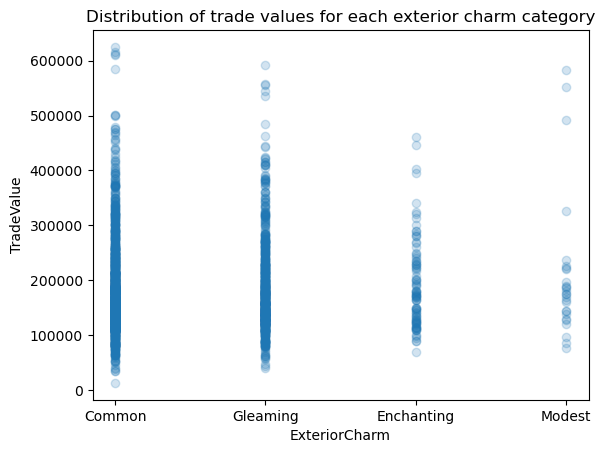

In [30]:
plt.scatter(df['ExteriorCharm'], df['TradeValue'], alpha=0.2)
plt.title('Distribution of trade values for each exterior charm category')
plt.xlabel('ExteriorCharm')
plt.ylabel('TradeValue')
plt.show()

## 3. Modelling